Lifelong data from paper: https://www.nature.com/articles/s41467-021-27594-w#data-availability

In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath("../../src/utils"))
from preprocess import * 


In [40]:
atac_cells_to_psd = merge_cluster_metadata('atac', 'peak_region_fragments')
# rename cell to atac_cell
atac_cells_to_psd.rename(columns={'cell': 'atac_cell'}, inplace=True)
atac_cells_to_psd

,atac_cell,peak_region_fragments,stage_dpf,annotation,pseudobulk
0,AAACGAAAGGATATCA-1,3714,1.5,cycling cells,1.5_cycling cells
1,AAACGAAAGTTCCCGG-1,8365,1.5,cycling cells,1.5_cycling cells
2,AAACGAAAGTTTACGC-1,4322,1.5,cycling cells,1.5_cycling cells
3,AAACGAACAATGACTC-1,9818,1.5,cycling cells,1.5_cycling cells
4,AAACGAATCGGTTAGT-1,7185,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
36736,TTTGTGTGTGTTAGAA-1,4113,210.0,gill progenitor 1,210_gill progenitor 1
36737,TTTGTGTTCAATCGTG-1,2713,210.0,stroma 1,210_stroma 1
36738,TTTGTGTTCTCATATC-1,3648,210.0,perivascular,210_perivascular
36739,TTTGTGTTCTTCTCTC-1,6777,210.0,teeth,210_teeth


In [41]:
print(f"Total pseudobulks: {len(atac_cells_to_psd['pseudobulk'].unique())}")

Total pseudobulks: 75


/tmp/ipykernel_2051705/2693870491.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


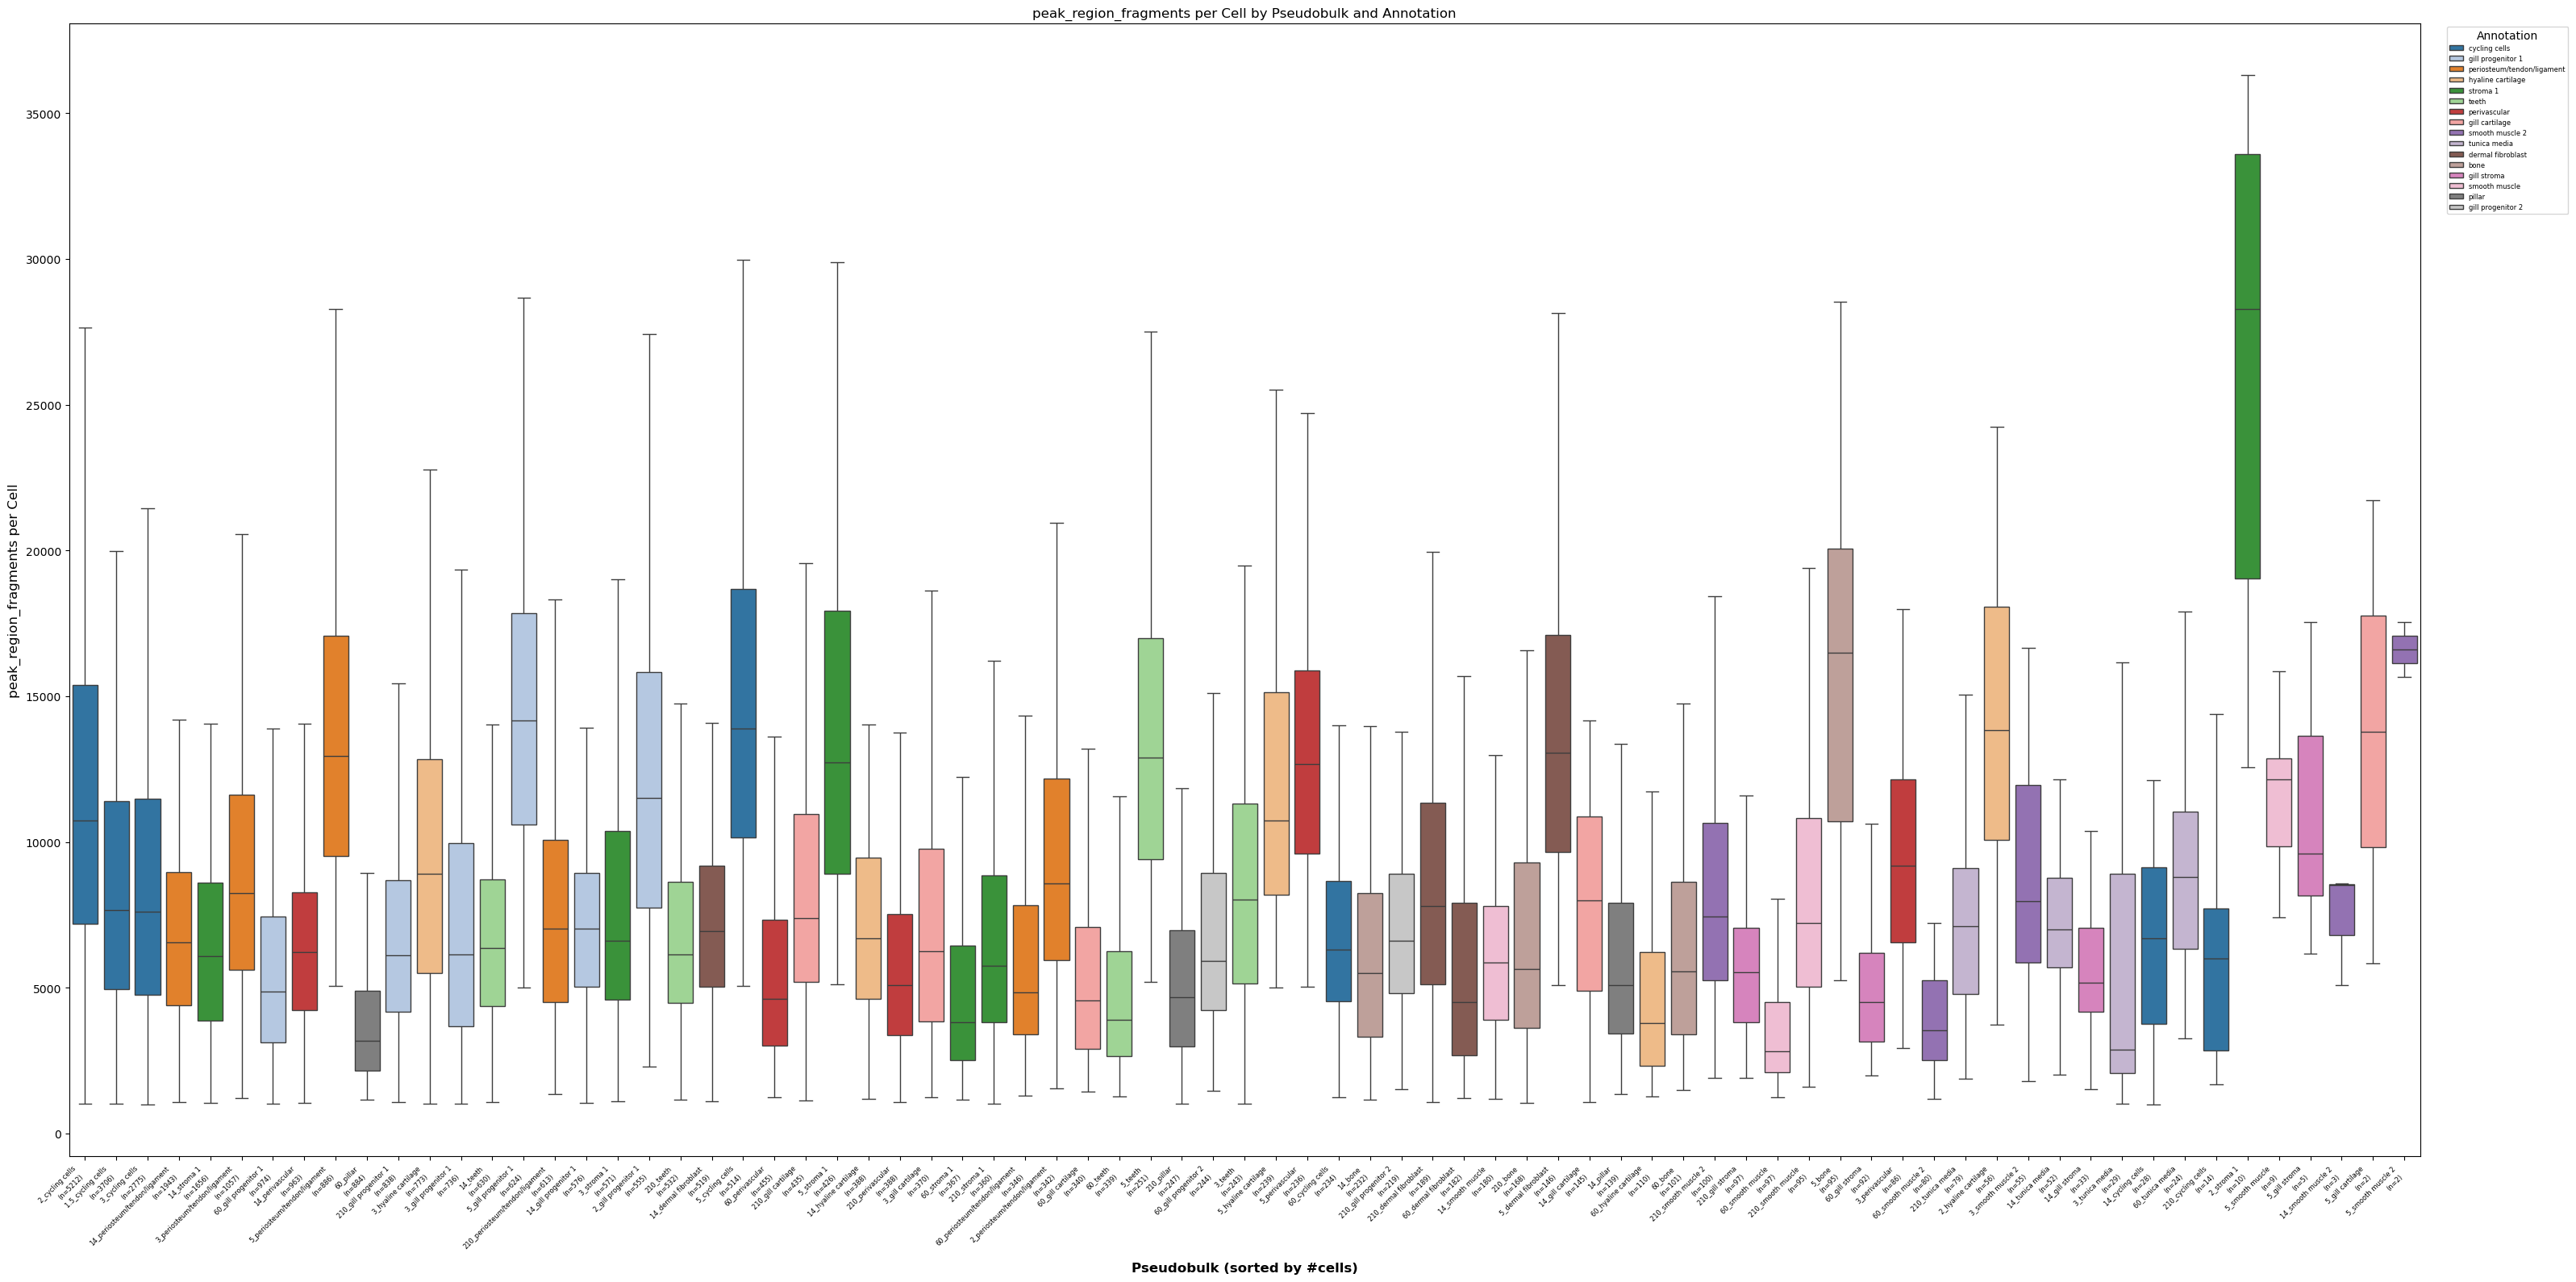

In [52]:
plot_pseudobulk_distributions(atac_cells_to_psd, count_col = 'peak_region_fragments', max_pseudobulks=75)

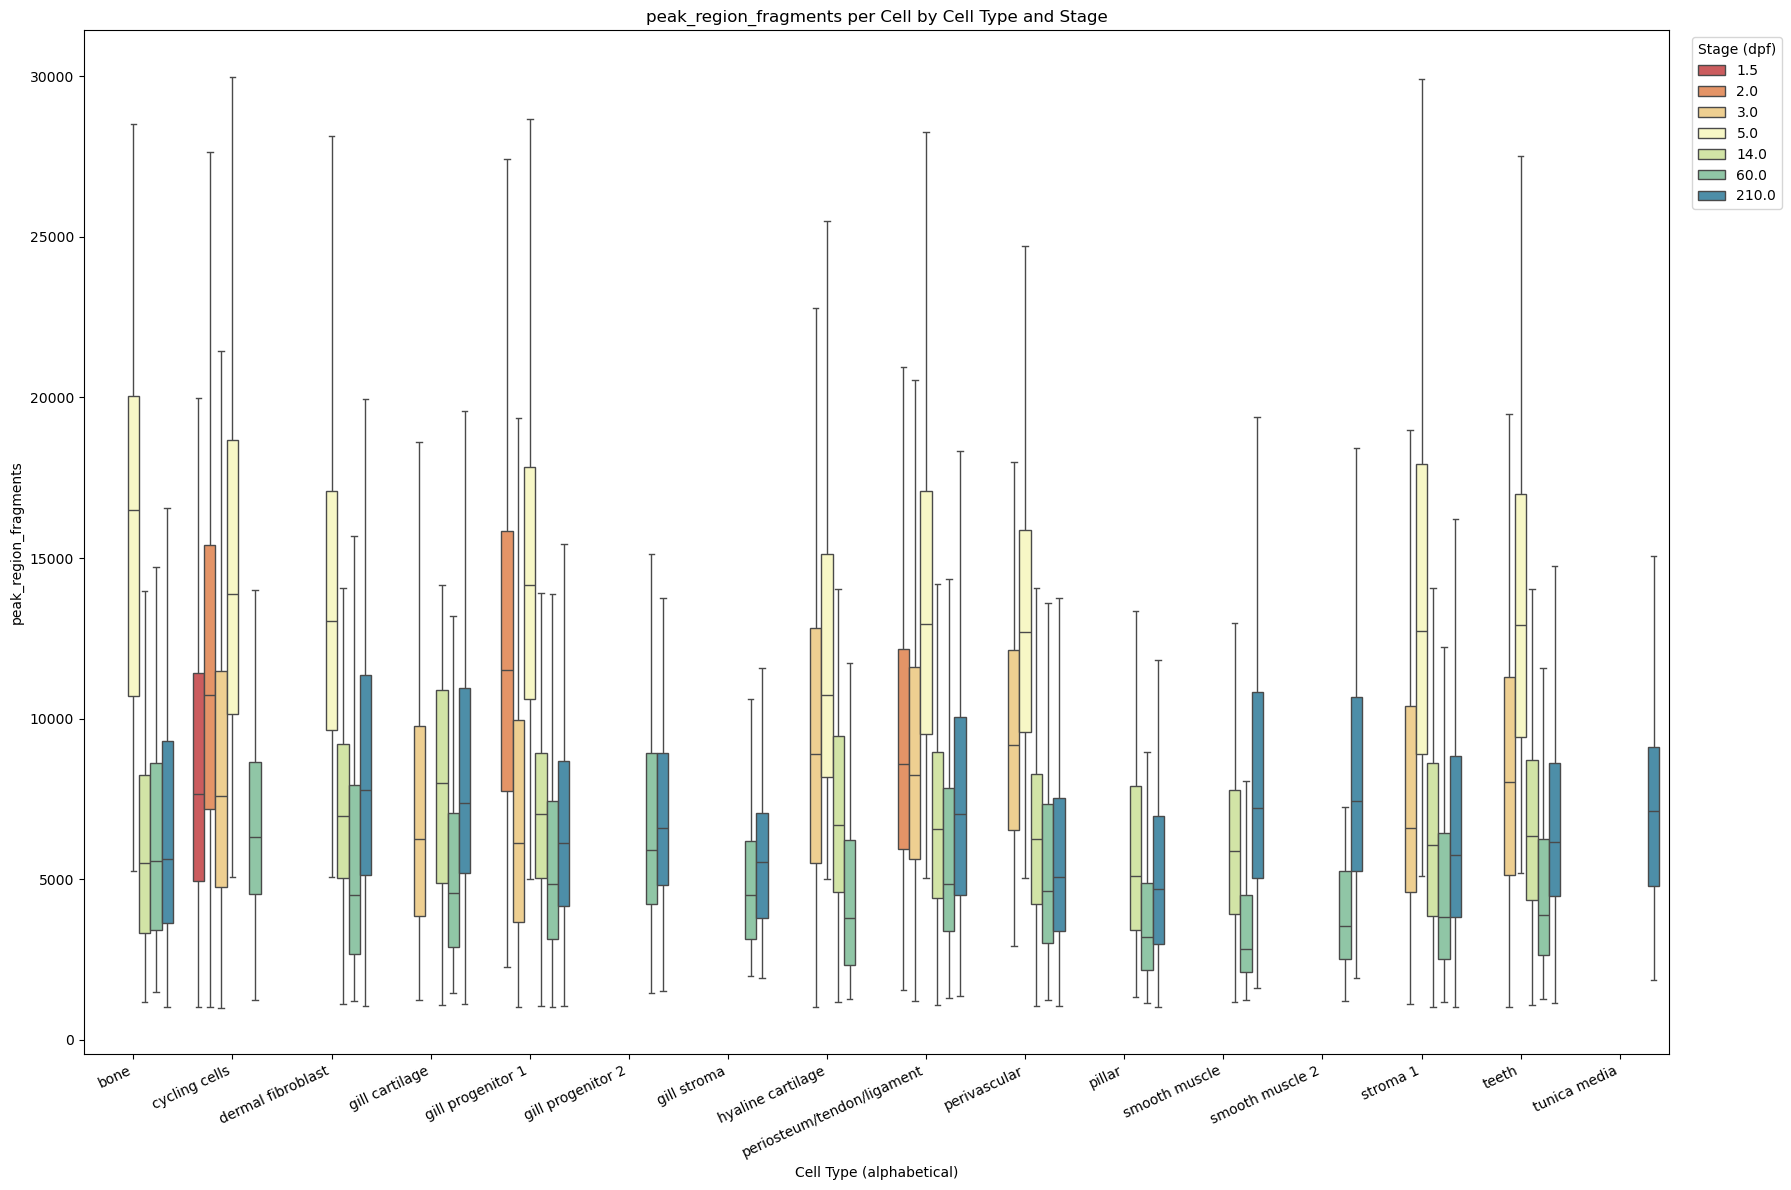

In [54]:
plot_reads_per_cell_by_celltype_and_stage(atac_cells_to_psd, count_col='peak_region_fragments', min_cells_per_group=75)

In [56]:

def merge_cluster_metadata(modality, counts_col):
    stages = [1.5, 2, 3, 5, 14, 60, 150]
    data_dir = "../../data/lifelong/raw/metadata_clusters"
    dfs = []
    
    for stage in stages:
        filepath = os.path.join(data_dir, f"{modality}_dpf{stage}_metadata.tsv")
        if os.path.exists(filepath):
            df = pd.read_csv(filepath, sep='\t')
            df['stage_dpf'] = stage
            df['pseudobulk'] = df['stage_dpf'].astype(str) + '_' + df['annotation'].astype(str)
            dfs.append(df[['cell', counts_col, 'stage_dpf', 'annotation', 'pseudobulk']])
    
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

In [57]:
rna_cells_to_psd = merge_cluster_metadata('rna', 'nCount_RNA')
rna_cells_to_psd


,cell,nCount_RNA,stage_dpf,annotation,pseudobulk
0,Sox10BtR_36hpf-1_020618_AAACCTGGTTCACCTC-1,6103,1.5,cycling cells,1.5_cycling cells
1,Sox10BtR_36hpf-1_020618_AAACGGGGTAACGTTC-1,6839,1.5,cycling cells,1.5_cycling cells
2,Sox10BtR_36hpf-1_020618_AAACGGGGTACTCAAC-1,7758,1.5,cycling cells,1.5_cycling cells
3,Sox10BtR_36hpf-1_020618_AAACGGGGTATAGGGC-1,8253,1.5,cycling cells,1.5_cycling cells
4,Sox10BtR_36hpf-1_020618_AAACGGGGTCAAAGAT-1,1658,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
46156,3_TTTGTCACAATAACGA-1,6016,150.0,gill cartilage,150_gill cartilage
46157,3_TTTGTCAGTCTCCACT-1,2241,150.0,periosteum/tendon/ligament,150_periosteum/tendon/ligament
46158,3_TTTGTCATCAAAGACA-1,6582,150.0,gill cartilage,150_gill cartilage
46159,3_TTTGTCATCAACACCA-1,1300,150.0,teeth,150_teeth


/tmp/ipykernel_2051705/2693870491.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=6, linespacing=1.7)


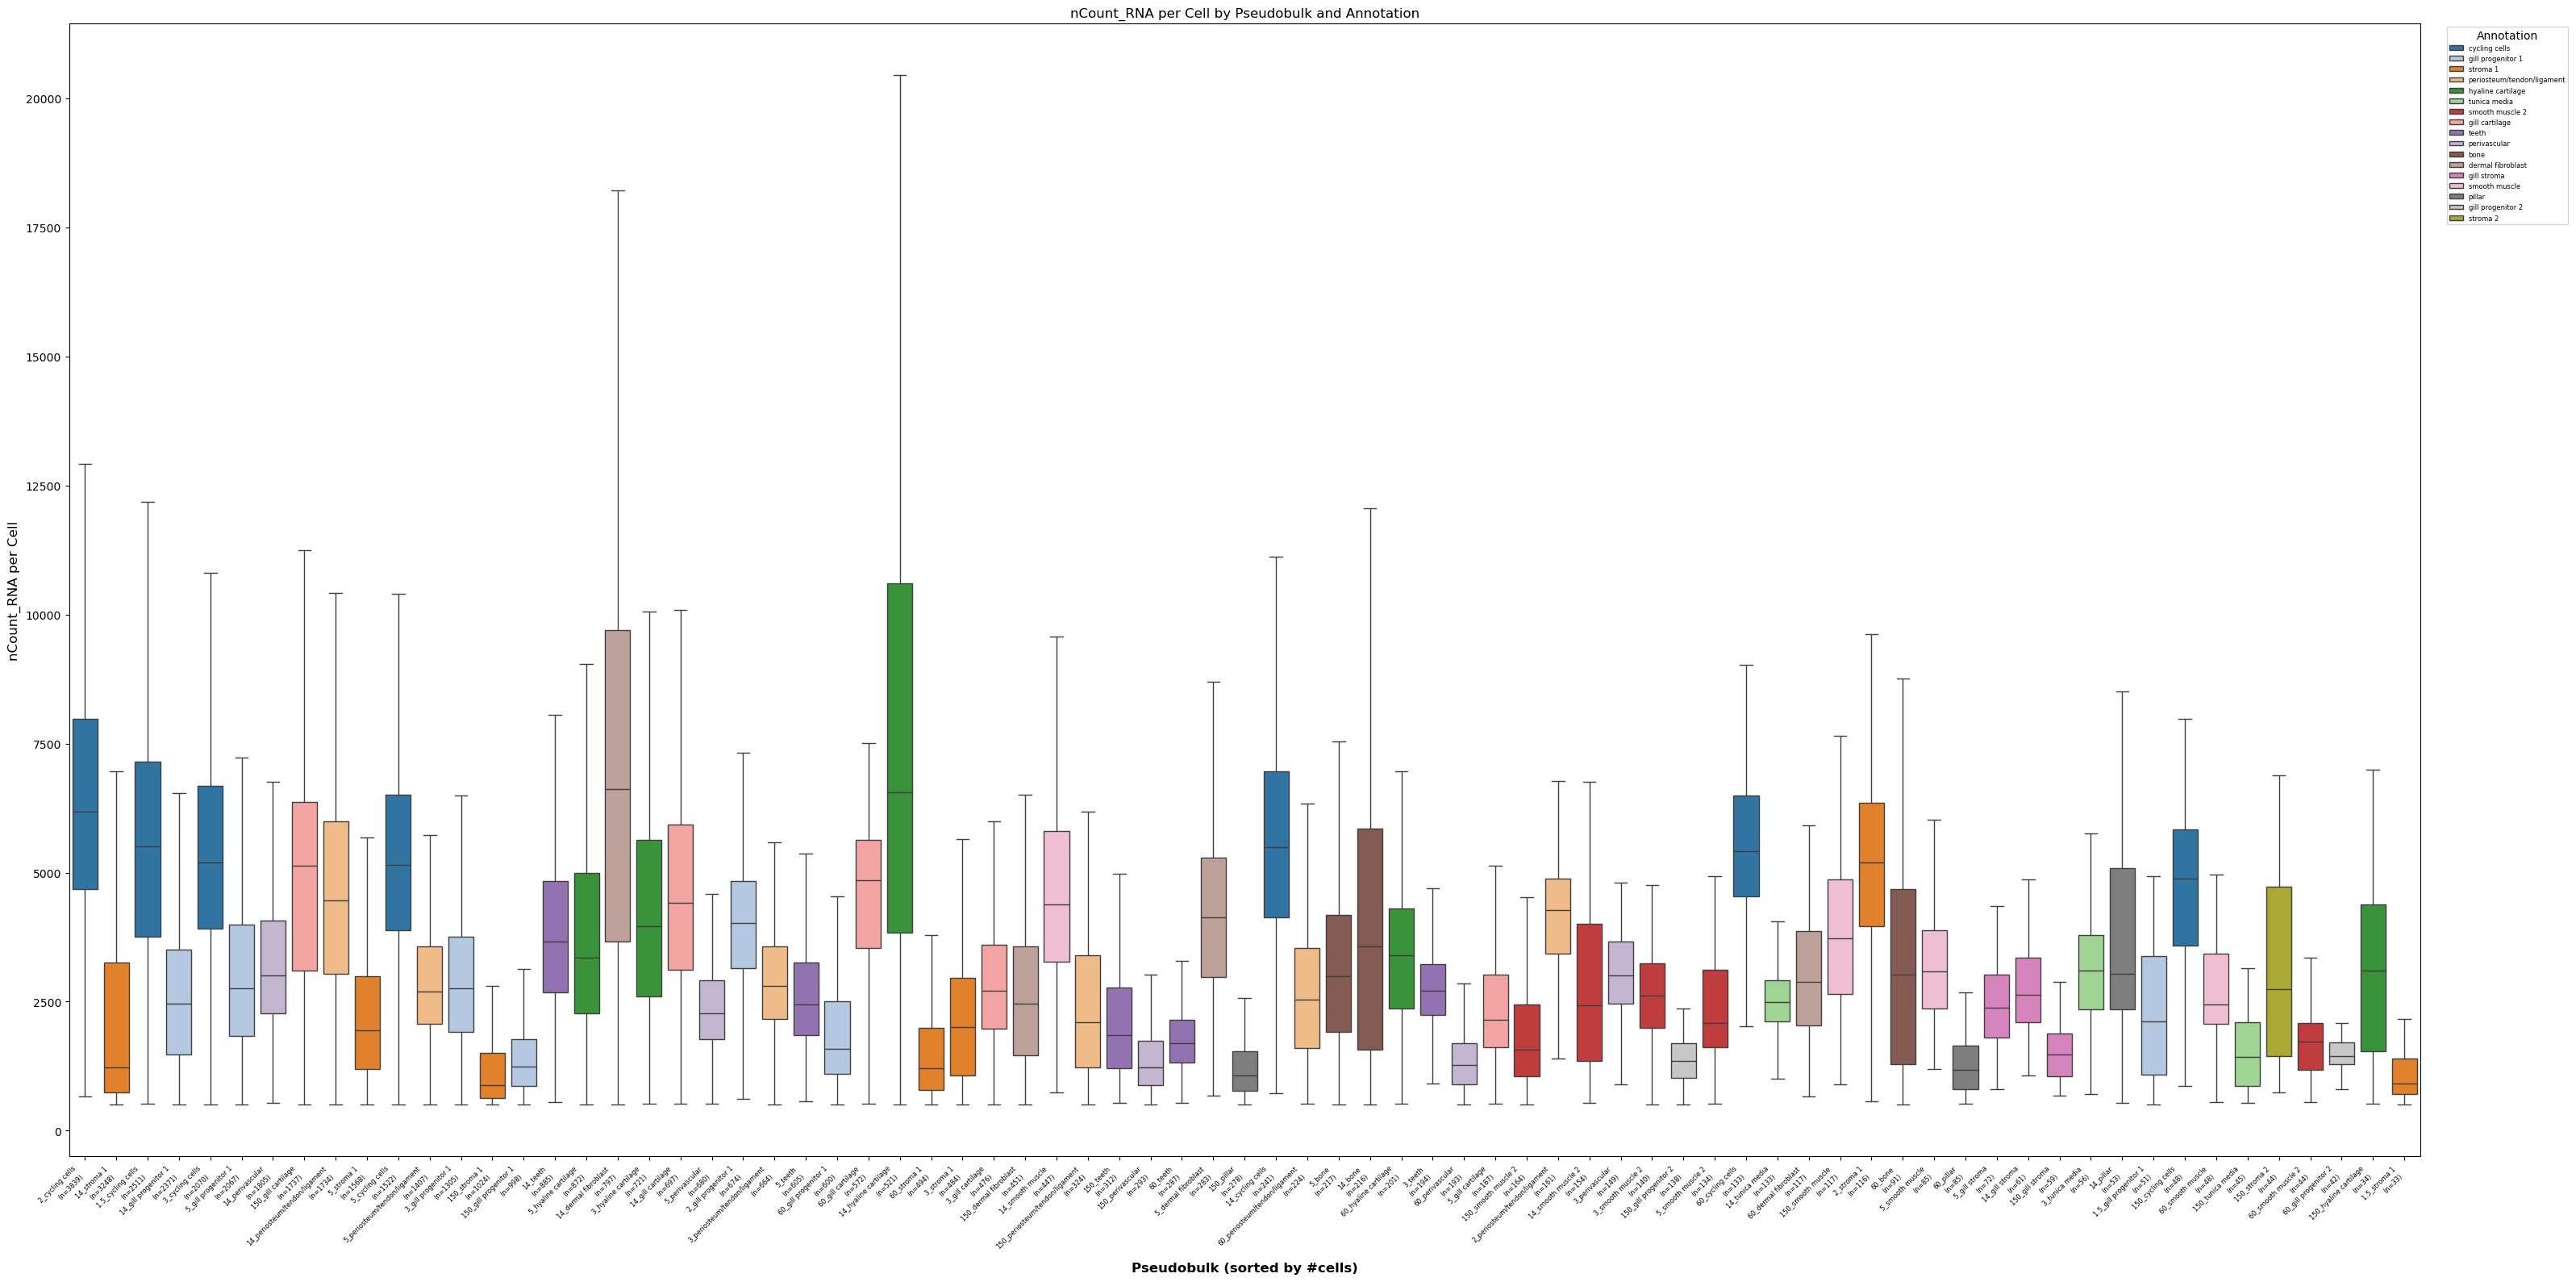

In [58]:
plot_pseudobulk_distributions(rna_cells_to_psd, count_col = 'nCount_RNA', max_pseudobulks=75)

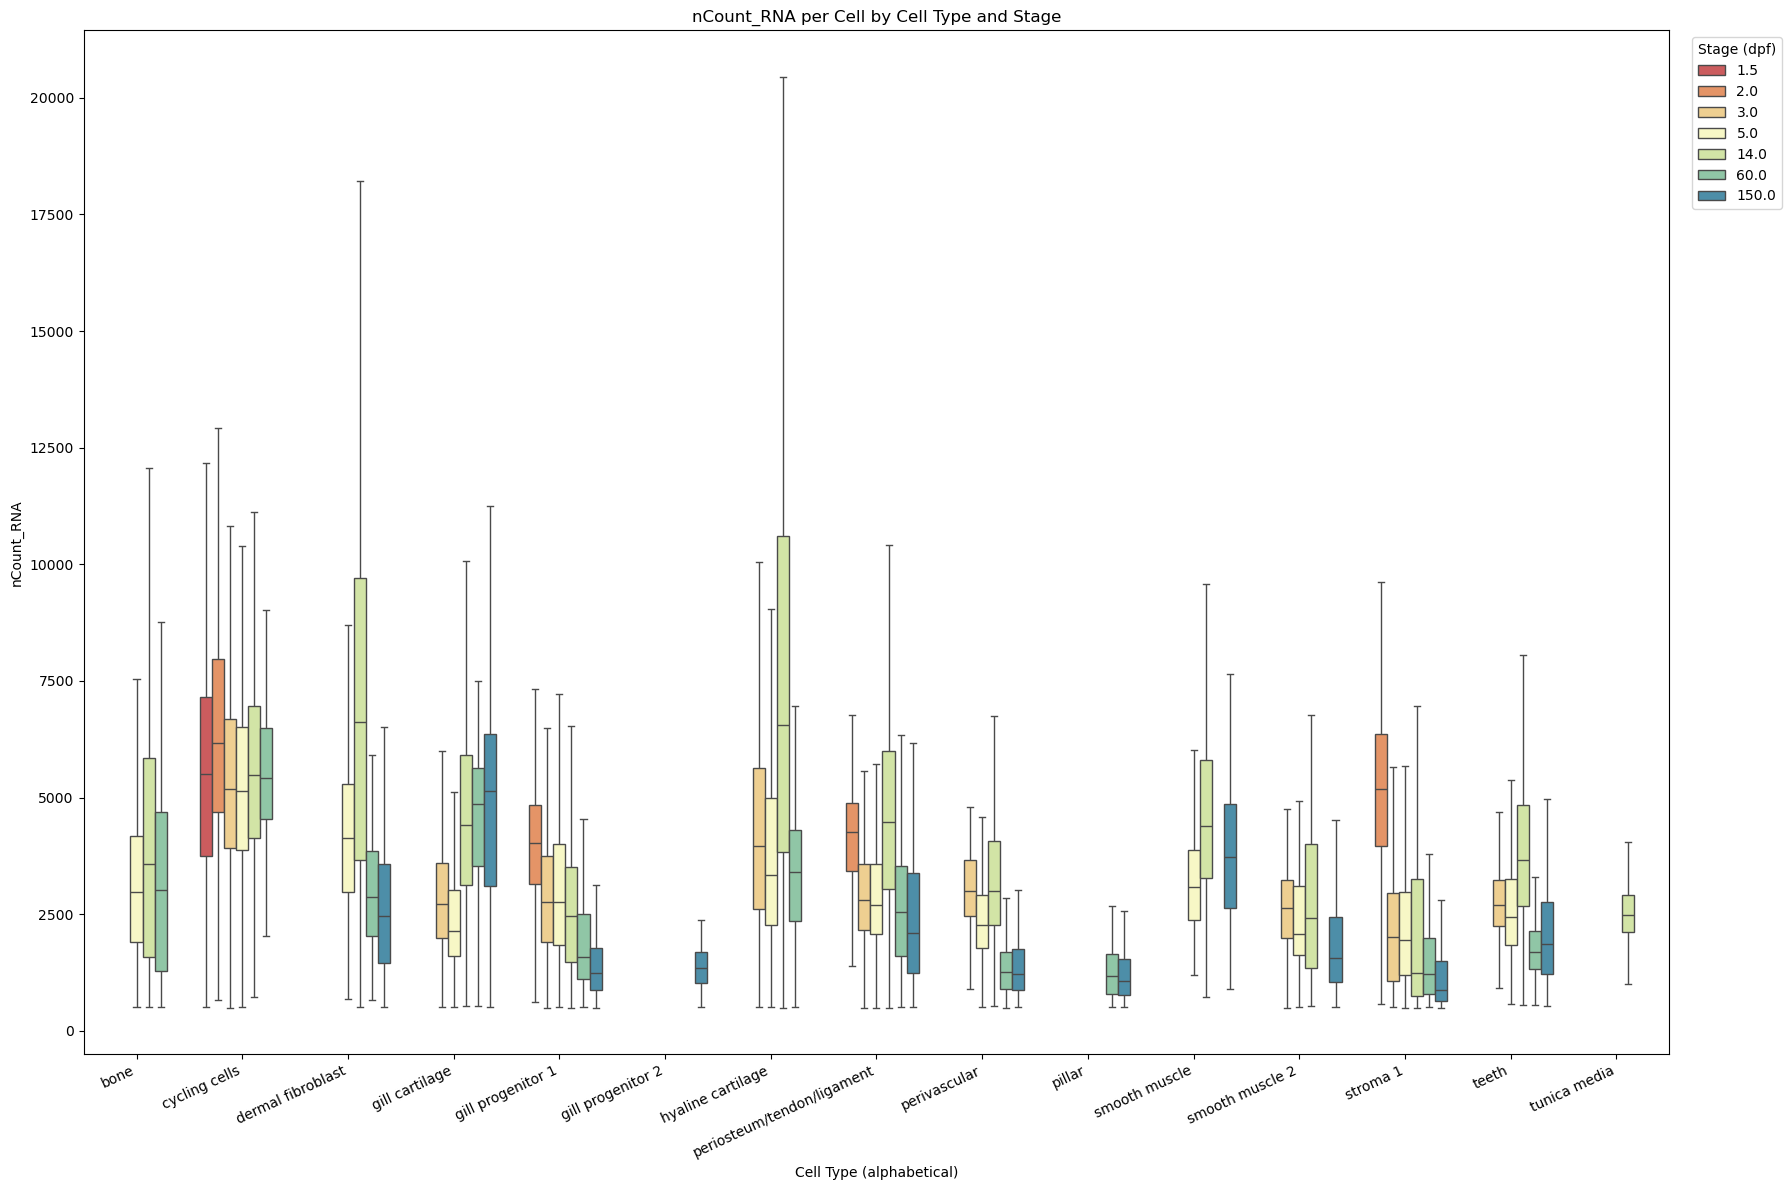

In [59]:
plot_reads_per_cell_by_celltype_and_stage(rna_cells_to_psd, count_col='nCount_RNA', min_cells_per_group=75)

In [65]:
atac_cells_to_psd


,atac_cell,peak_region_fragments,stage_dpf,annotation,pseudobulk
0,AAACGAAAGGATATCA-1,3714,1.5,cycling cells,1.5_cycling cells
1,AAACGAAAGTTCCCGG-1,8365,1.5,cycling cells,1.5_cycling cells
2,AAACGAAAGTTTACGC-1,4322,1.5,cycling cells,1.5_cycling cells
3,AAACGAACAATGACTC-1,9818,1.5,cycling cells,1.5_cycling cells
4,AAACGAATCGGTTAGT-1,7185,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
36736,TTTGTGTGTGTTAGAA-1,4113,210.0,gill progenitor 1,210_gill progenitor 1
36737,TTTGTGTTCAATCGTG-1,2713,210.0,stroma 1,210_stroma 1
36738,TTTGTGTTCTCATATC-1,3648,210.0,perivascular,210_perivascular
36739,TTTGTGTTCTTCTCTC-1,6777,210.0,teeth,210_teeth


In [61]:
rna_cells_to_psd

,cell,nCount_RNA,stage_dpf,annotation,pseudobulk
0,Sox10BtR_36hpf-1_020618_AAACCTGGTTCACCTC-1,6103,1.5,cycling cells,1.5_cycling cells
1,Sox10BtR_36hpf-1_020618_AAACGGGGTAACGTTC-1,6839,1.5,cycling cells,1.5_cycling cells
2,Sox10BtR_36hpf-1_020618_AAACGGGGTACTCAAC-1,7758,1.5,cycling cells,1.5_cycling cells
3,Sox10BtR_36hpf-1_020618_AAACGGGGTATAGGGC-1,8253,1.5,cycling cells,1.5_cycling cells
4,Sox10BtR_36hpf-1_020618_AAACGGGGTCAAAGAT-1,1658,1.5,cycling cells,1.5_cycling cells
...,...,...,...,...,...
46156,3_TTTGTCACAATAACGA-1,6016,150.0,gill cartilage,150_gill cartilage
46157,3_TTTGTCAGTCTCCACT-1,2241,150.0,periosteum/tendon/ligament,150_periosteum/tendon/ligament
46158,3_TTTGTCATCAAAGACA-1,6582,150.0,gill cartilage,150_gill cartilage
46159,3_TTTGTCATCAACACCA-1,1300,150.0,teeth,150_teeth


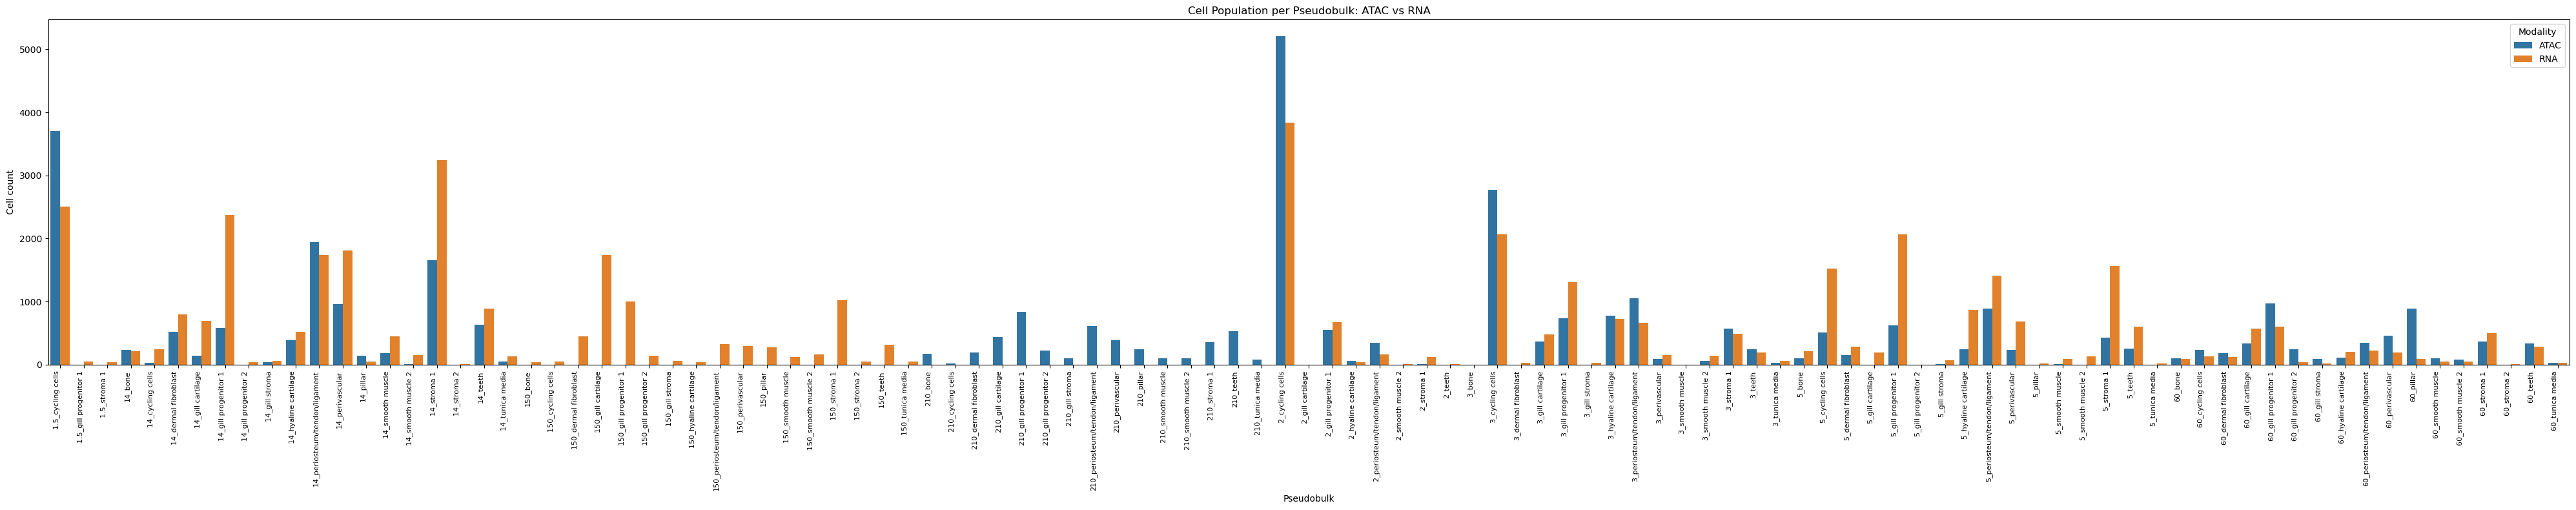

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have already loaded:
# atac_cells_to_psd and rna_cells_to_psd

# 1. Count number of cells per pseudobulk in each dataset
atac_counts = atac_cells_to_psd['pseudobulk'].value_counts().rename('ATAC').reset_index()
atac_counts.columns = ['pseudobulk', 'ATAC']

rna_counts = rna_cells_to_psd['pseudobulk'].value_counts().rename('RNA').reset_index()
rna_counts.columns = ['pseudobulk', 'RNA']

# 2. Merge counts to align pseudobulks
merged = pd.merge(atac_counts, rna_counts, on='pseudobulk', how='outer').fillna(0)

# 3. Melt for seaborn plotting
plot_df = merged.melt(id_vars='pseudobulk', value_vars=['ATAC', 'RNA'], var_name='Modality', value_name='Cell count')

# 4. Sort pseudobulks for nicer plotting
sorted_pseudobulks = sorted(merged['pseudobulk'].unique())
plot_df['pseudobulk'] = pd.Categorical(plot_df['pseudobulk'], categories=sorted_pseudobulks, ordered=True)

# 5. Make the plot (side-by-side bar plot)
plt.figure(figsize=(min(40, len(sorted_pseudobulks) * 0.7), 8))
ax = sns.barplot(
    data=plot_df, x='pseudobulk', y='Cell count', hue='Modality'
)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.xlabel('Pseudobulk')
plt.ylabel('Cell count')
plt.title('Cell Population per Pseudobulk: ATAC vs RNA')
plt.legend(title='Modality')
plt.tight_layout()
plt.show()
